In [4]:
import pdfplumber
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import time

file = '../pdfs/Nurse.pdf'

In [2]:
# extract text and page numbers
def get_pages(file):
    '''
    Gets list of page text.
    input: path to the pdf file
    output: list of tuples (page #, page text string)
    '''
    # TODO better pdf2text conversion
    corpus = []
    with pdfplumber.open(file) as pdf:
        for i, page in enumerate(pdf.pages):
            corpus.append((i, page.extract_text()))
    pdf.close()
    return corpus

In [6]:
before_time = time.time()
raw_corpus = get_pages(file)
print(time.time() - before_time)

In [44]:
def clean_string(s):
    '''
    First stage of pre-processing: cleaning the string text
    input: string
    output: string
    '''
    # TODO more thorough
    # TODO convert accented letters to english
    text = s.lower()
    text = re.sub('[^0-9a-z]+', ' ', s) # replace non-alphanumeric chars with space
    return text

In [45]:
def tokenize(s):
    '''
    Second stage of pre-processing: tokenize the text
    [s]: string
    output: list of tokens
    '''
    # TODO better tokenization
    return s.split(' ')

In [78]:
def clean_tokens(tokens):
    '''
    Third stage of pre-processing: remove useless tokens
    [tokens]: list of words
    output: list of words where useless tokens are removed
    '''
    # TODO more thorough
    stopwords_set = set(stopwords.words('english'))
    result = [w for w in tokens if w.isalpha()] # remove non-letter tokens
    result = [w for w in result if len(w) >= 2] # remove tokens below a certain length
    result = [w for w in result if w not in stopwords_set] # remove stopwords
    return result

In [47]:
def clean_corpus(corpus):
    '''
    [corpus]: List<Tuple(page_num, text_string)>
    output: pre-processed corpus
    '''
    # TODO save as txt / hook up with backend
    result = [(i, clean_tokens(tokenize(clean_string(s))) ) for (i, s) in corpus if s]
    result = [(i, arr) for (i, arr) in result if arr] # remove empty pages
    return result

def get_display_text(cleaned_corpus):
    lines = ""
    with open("output.txt", "w", encoding = 'utf8') as txt_file:
        for _,line in cleaned_corpus:
            if line:
                txt_file.write(" ".join(line) + "\n") # TODO is it really necessary to write to local txt
                lines += " ".join(line)+ "\n"
    return lines

In [79]:
before_time = time.time()
cleaned_corpus = clean_corpus(raw_corpus)
lines_text = get_display_text(cleaned_corpus)
print(time.time() - before_time)

0.4413740634918213


In [85]:
def make_wordcount_hist(corpus, top = 10):
    '''
    Generate a histogram of word counts from given text, open a new window with the histogram
    input: cleaned corpus that has been tokenized
    output: histogra: the number of counts for top frequent words
    '''
    tokens = []
    for _ , arr in corpus:
        tokens += arr
    uniques, counts = np.unique(tokens, return_counts = True)
    sorted_inds = np.argsort(counts)
    uniques_sorted = np.flip(uniques[sorted_inds[-top:]])
    counts_sorted = np.flip(counts[sorted_inds[-top:]])
    fig, ax = plt.subplots()
    ax.bar(uniques_sorted, counts_sorted)
    plt.setp(ax.get_xticklabels(), rotation='vertical')
    fig.savefig('hist.png', dpi=600)
    plt.show()
    return uniques, counts

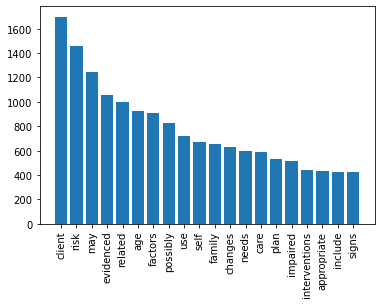

In [87]:
uniques, counts = make_wordcount_hist(cleaned_corpus, 20)

In [ ]:
# TODO vector embedding for documents: BoW, tf-idf, word2vec

In [ ]:
# TODO similarity measures: cosine, edit distance, jaccard